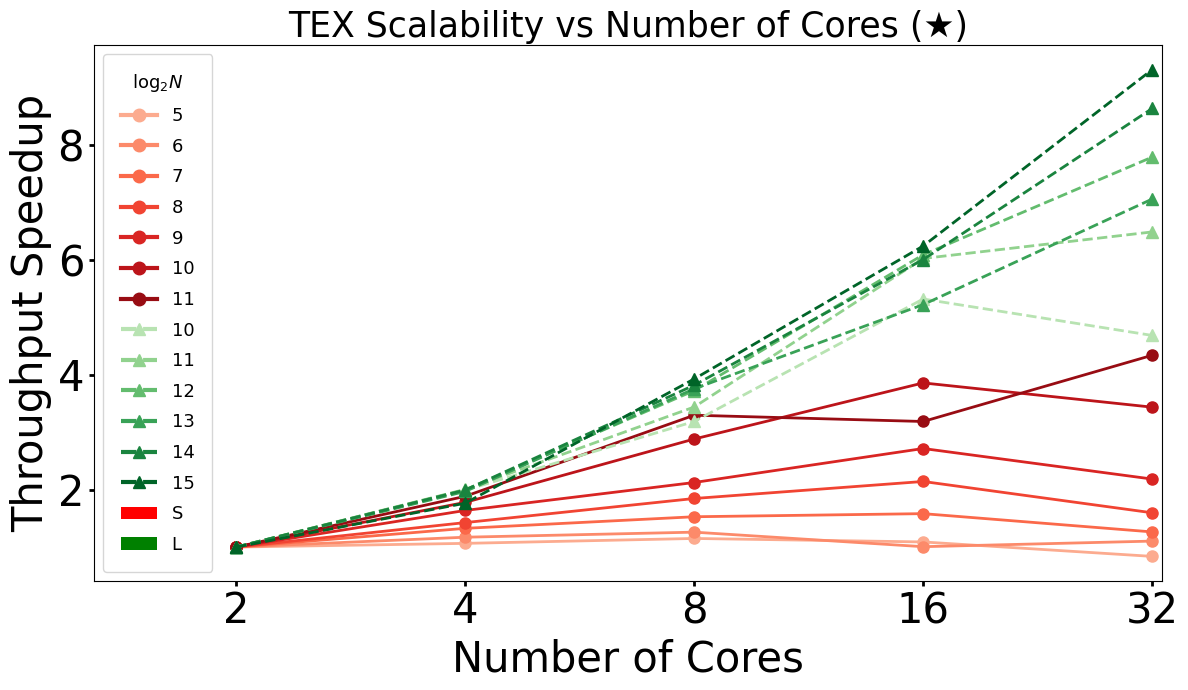

In [18]:
import numpy as np
import torch
import torchhd.functional as hd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


import os


def plot_scalability_vs_cores(dataset_name, platform, speedup_LL, speedup_HT):
    """
    Plots throughput speedup vs number of cores for a given dataset and platform,
    excluding the final SMT thread datapoint (2x physical cores).
    """
    if platform.upper() == "AMD":
        symbol = "★"
        max_cores = 64
    elif platform.upper() == "INTEL":
        symbol = "♠"
        max_cores = 128
    else:
        raise ValueError("Platform must be either 'AMD' or 'INTEL'")

    fig, ax = plt.subplots(figsize=(12, 7))

    # Colors
    S_colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(speedup_LL)))
    L_colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(speedup_HT)))

    # Plot ScalableHD-S (LL)
    for i, (N, data) in enumerate(speedup_LL.items()):
        ax.plot(
            data['cores'][:-1],
            data['speedup'][:-1],
            color=S_colors[i],
            marker='o',
            linestyle='-',
            linewidth=2,               # ⬅️ 1.5× thicker lines
            markersize=8               # ⬅️ 1.5–2× larger markers
        )

    # Plot ScalableHD-L (HT)
    for i, (N, data) in enumerate(speedup_HT.items()):
        ax.plot(
            data['cores'][:-1],
            data['speedup'][:-1],
            color=L_colors[i],
            marker='^',
            linestyle='--',
            linewidth=2,
            markersize=8
        )

    # Axes formatting
    ax.set_xscale('log', base=2)
    xticks = [2, 4, 8, 16, 32, 64] if max_cores == 64 else [2, 4, 8, 16, 32, 64, 128]
    ax.set_xticks(xticks[:-1])
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.set_xlim(1.3, max_cores // 2 + 1)

    # Labels and title with increased font sizes
    ax.set_title(f'{dataset_name} Scalability vs Number of Cores ({symbol})',
                 fontsize=25)#, fontweight='bold')
    ax.set_xlabel('Number of Cores', fontsize=30)#, fontweight='bold')
    ax.set_ylabel('Throughput Speedup', fontsize=30)#, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=30, width=2)
    #for label in ax.get_xticklabels() + ax.get_yticklabels():
    #    label.set_fontweight('bold')

    # Legends
    logN_labels_LL = [fr'{int(np.log2(N))}' for N in speedup_LL.keys()]
    logN_labels_HT = [fr'{int(np.log2(N))}' for N in speedup_HT.keys()]
    logN_legend_handles_LL = [
        plt.Line2D([0], [0], color=color, marker='o', linestyle='-', linewidth=3, markersize=9, label=lbl)
        for color, lbl in zip(S_colors, logN_labels_LL)
    ]
    logN_legend_handles_HT = [
        plt.Line2D([0], [0], color=color, marker='^', linestyle='--', linewidth=3, markersize=9, label=lbl)
        for color, lbl in zip(L_colors, logN_labels_HT)
    ]
    variant_legend_handles = [
        Patch(facecolor='red', label='S'),
        Patch(facecolor='green', label='L')
    ]

    combined_handles = logN_legend_handles_LL + logN_legend_handles_HT + variant_legend_handles
    ax.legend(
        handles=combined_handles,
        title=r'$\mathrm{log}_2 N$',
        title_fontsize=13,
        fontsize=13,
        loc='upper left',
        bbox_to_anchor=(0.0, 1.00),
        ncol=1,
        borderpad=1.0,
        labelspacing=0.7
    )

    save_path = f'scalability/scalability_{dataset_name}_{platform}.pdf'
    plt.tight_layout()
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()

def get_speedup_itself(result):
    speedup_dict = {}
    for N in result:
        for key in result[N]:
            baseline = result[N][key]['throughput'][0]
            speedups = [throughput/baseline for throughput in result[N][key]['throughput']]
            cores = result[N][key]['2T']
            if N not in speedup_dict:
                speedup_dict[N] = {}
            speedup_dict[N][key] = {'speedup': speedups, 'cores': cores}
    return speedup_dict


PLATFORM = 'AMD'
from throughput_results.TEX_AMD import *







scalability_HT_whole = get_speedup_itself(HT_processed)
scalability_HT = {}
for key in scalability_HT_whole:
    scalability_HT[key] = scalability_HT_whole[key]['32_8']
scalability_LL_whole = get_speedup_itself(LL_processed)
scalability_LL = {}
for key in scalability_LL_whole:
    scalability_LL[key] = scalability_LL_whole[key]['32_8']





plot_scalability_vs_cores(dataset_name=HT_metadata['dataset'],
                          platform=PLATFORM,
                          speedup_LL=scalability_LL,
                          speedup_HT=scalability_HT)